<a href="https://colab.research.google.com/github/rnjsdn12332/GAN_study/blob/main/basic_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import torch.nn.functional as F


In [2]:
n_dim=2
#make_blobs는 사이킷런에서 제공해주는 예제용 데이터셋을 만들어주는 함수
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, 
                              centers=[[1,1],[-1,-1],[1,-1],[-1,1]],
                              shuffle=True, cluster_std=0.3) #학습 데이터셋 80개 네개의 클러스터
                              #make_blobs 함수가 만들어내는 레이블데이터는 각 데이터 한점한점이 몇번째 클러스터에 속해있는지 알려주는 인덱스

x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, 
                            centers=[[1,1], [-1,-1],[1,-1],[-1,1]])


In [5]:
def label_map(y_, from_, to_) :
    y=numpy.copy(y_)
    for f in from_ :
        y[y_ == f] = to_
    return y

y_train=label_map(y_train, [0,1],0)
y_train=label_map(y_train, [2,3],1)
y_test=label_map(y_test, [0,1],0)
y_test=label_map(y_test, [2,3],1)


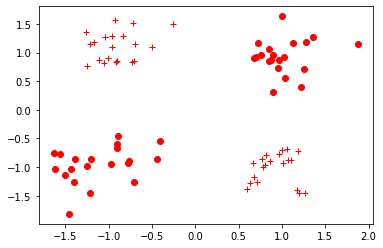

In [8]:

#데이터가 제대로 만들어지고 있는지 확인 -> 레이블이 0인 데이터는 점으로 1인ㄷ 데이터는 십자가로
def vis_data(x,y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*',markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [14]:
#넘파이 벡터 형식을 파이토치 텐서로 바꿔줌
x_train = torch.FloatTensor(x_train)
print(x_train.size())
print(y_train.size())
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

torch.Size([80, 2])
torch.Size([80])


In [11]:
class NeuralNet(torch.nn.Module):
        def __init__(self, input_size, hidden_size):
            super(NeuralNet, self).__init__()
            self.input_size = input_size
            self.hidden_size  = hidden_size
            self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
            self.relu = torch.nn.ReLU()
            self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
            self.sigmoid = torch.nn.Sigmoid()
            
        def forward(self, input_tensor):
            linear1 = self.linear_1(input_tensor)
            relu = self.relu(linear1) #입력값이 0보다 작으면 0, 0보다 크면 그대로 출력
            linear2 = self.linear_2(relu)
            output = self.sigmoid(linear2)#0과 1사이로 출력
            return output

In [12]:
model = NeuralNet(2, 5)
learning_rate = 0.03
criterion = torch.nn.BCELoss()
epochs = 2000
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [16]:

test_loss_before = criterion(model(x_test).squeeze(), y_test)
print('Before Training, test loss is {}'.format(test_loss_before.item()))

Before Training, test loss is 0.6639257669448853


In [17]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    if epoch % 100 == 0:
        print('Train loss at {} is {}'.format(epoch, train_loss.item()))
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 0.6569873690605164
Train loss at 100 is 0.5692602396011353
Train loss at 200 is 0.4575928747653961
Train loss at 300 is 0.34150996804237366
Train loss at 400 is 0.24226880073547363
Train loss at 500 is 0.1702084243297577
Train loss at 600 is 0.12368264049291611
Train loss at 700 is 0.09410642087459564
Train loss at 800 is 0.07453648746013641
Train loss at 900 is 0.060943055897951126
Train loss at 1000 is 0.05107168108224869
Train loss at 1100 is 0.043651167303323746
Train loss at 1200 is 0.03790866583585739
Train loss at 1300 is 0.03336430341005325
Train loss at 1400 is 0.029693379998207092
Train loss at 1500 is 0.026676606386899948
Train loss at 1600 is 0.024159330874681473
Train loss at 1700 is 0.022031990811228752
Train loss at 1800 is 0.02021424099802971
Train loss at 1900 is 0.018645742908120155


In [18]:
test_loss = criterion(torch.squeeze(model(x_test)), y_test)
print('After Training, test loss is {}'.format(test_loss.item()))

After Training, test loss is 0.8638874292373657


In [19]:

torch.save(model.state_dict(), './model.pt')
print('state_dict format of the model: {}'.format(model.state_dict()))

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[-0.2034, -0.3661],
        [-1.6837, -1.4927],
        [-1.2928,  1.4805],
        [ 1.2130, -1.3743],
        [ 1.6907,  1.4050]])), ('linear_1.bias', tensor([-0.4299,  0.0023, -0.0211, -0.0120, -0.0968])), ('linear_2.weight', tensor([[-0.0631, -2.0961,  1.8232,  1.8516, -2.0849]])), ('linear_2.bias', tensor([0.6259]))])


학습된 모델을 state_dict()함수 형태로 바꿔준 후 pt파일로 저장
state_dict()함수는 모델 내 가중치들이 딕셔너리 형태로 {연산 이름 : 가중치 텐서와 편향 텐서}와 같이 표현된 데이터

이렇게 파일을 저장하면 후에 이 파일을 읽어들여 새로운 신경망 객체에 이미 학습된 모델의 가중치를 적용할 수 있음!

In [20]:
new_model = NeuralNet(2,5)
new_model.load_state_dict(torch.load('./model.pt'))

<All keys matched successfully>

In [25]:
print("벡터 [-1,1]이 레이블 1을 가질 확률 : ",new_model(torch.FloatTensor([-1,1])).item())

벡터 [-1,1]이 레이블 1을 가질 확률 :  0.9947192668914795
